In [ ]:
# Задачи

#     Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов
#     (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию
#     папки, где лежит папка с пользователем)
   
#     Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через
#     запятую с пробелом и в алфавитном порядке.
    
#     Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
#     Сколько было продано единиц товара с product_id==56?
    
#     Визуализируйте продажи по дням.
    
#     Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать
#     покупку товара с одинаковым product_id, совершенную в разные дни. 

In [ ]:
#     Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов
#     (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию
#     папки, где лежит папка с пользователем)

In [213]:
import pandas as pd
import os # для работы с файлами

In [220]:
data = pd.DataFrame()
path_to_file = 'D:/JupyterNotebook/Karpov Course - Аналитик данных/data'
folder_data = [i for i in os.listdir(path_to_file)]
for date in folder_data:
    path_to_file = path_to_file + '/' + date
    folder_name = [i for i in os.listdir(path_to_file)]
    for name in folder_name:
        path_to_file = path_to_file + '/' + name
        
        folder_end = [i for i in os.listdir(path_to_file)]
        path_to_file = path_to_file + '/' + folder_end[0]
        data1 = pd.read_csv(path_to_file)
        path_to_file.split('/')
        col_name = path_to_file.split('/')[-2]
        col_date = path_to_file.split('/')[-3]
        data1['name'] = col_name
        data1['date'] = col_date
        data1 = data1.drop(['Unnamed: 0'], axis = 1)
        
#         print(path_to_file)
        path_to_file = ''
        path_to_file = 'D:/JupyterNotebook/Karpov Course - Аналитик данных/data'
        path_to_file = path_to_file + '/' + date

        data = pd.concat([data, data1])
     
    path_to_file = 'D:/JupyterNotebook/Karpov Course - Аналитик данных/data'


In [221]:
data

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
1,66,4,Rostislav_Petrov,2020-12-09
2,39,2,Rostislav_Petrov,2020-12-09
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09


In [222]:
data.quantity.sum()

480

In [ ]:
#     Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через
#     запятую с пробелом и в алфавитном порядке.

In [922]:
data \
    .groupby('name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [ ]:
#     Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
#     Сколько было продано единиц товара с product_id==56?

In [928]:
data_top_10 = data \
    .groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10)
data_top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [945]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

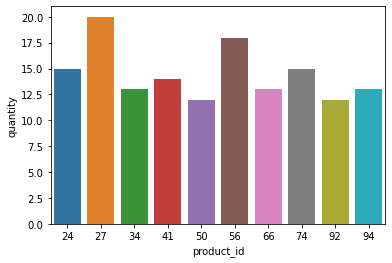

In [946]:
sns.barplot(x="product_id", y="quantity", data=data_top_10)

In [947]:
#     Визуализируйте продажи по дням.

In [948]:
data_day = data \
    .groupby('date', as_index=False) \
    .agg({'quantity': 'sum'})
data_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot:xlabel='date', ylabel='quantity'>

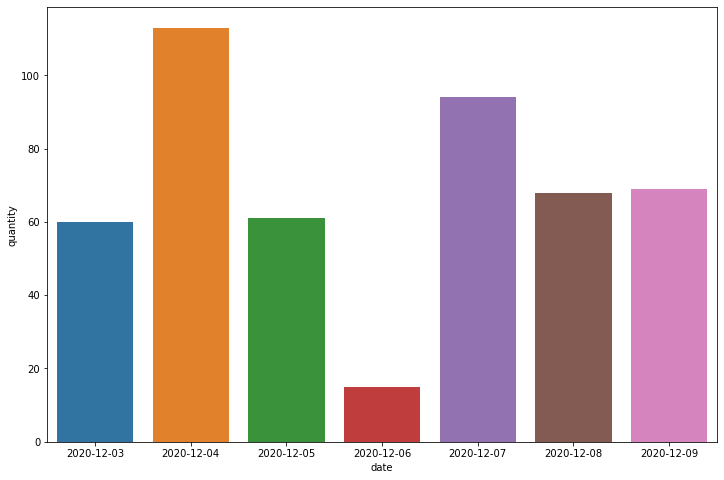

In [949]:
plt.figure(figsize=(12, 8))
sns.barplot(x="date", y="quantity", data=data_day)

In [ ]:
#     Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать
#     покупку товара с одинаковым product_id, совершенную в разные дни. 

In [971]:
data_drop = data.drop_duplicates(subset=['name', 'product_id', 'date'])
data_drop

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
1,66,4,Rostislav_Petrov,2020-12-09
2,39,2,Rostislav_Petrov,2020-12-09
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09


In [972]:
data_drop \
    .groupby(['name', 'product_id'], as_index=False) \
    .agg({'date': 'count'}) \
    .query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
